In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import pickle
import scipy.io as spio
import mat73
import seaborn as sns

In [2]:
import replay_structure.metadata as meta
import replay_structure.read_write as read_write

from replay_structure.config import (
    RatDay_Preprocessing_Parameters,
    Run_Snippet_Preprocessing_Parameters,
    Ripple_Preprocessing_Parameters,
    Selected_Data_Preprocessing_Parameters
)

from replay_structure.ratday_preprocessing import RatDay_Preprocessing
from replay_structure.ripple_preprocessing import Ripple_Preprocessing
from replay_structure.run_snippet_preprocessing import Run_Snippet_Preprocessing
from replay_structure.run_snippet_preprocessing import Selected_Data_Preprocessing

from replay_structure.metadata import Poisson
from replay_structure.metadata import string_to_data_type
from replay_structure.structure_analysis_input import Structure_Analysis_Input

In [3]:
%load_ext autoreload
%autoreload 2

## load data

In [72]:
path = '../data/'
data = mat73.loadmat(path+'Data4Pset.mat')
ripple_data = spio.loadmat(path+'ripples.mat')
ripple_data_new = spio.loadmat(path+'decodedPosition15ms.mat')

In [73]:
#data['RippleTimes'] = ripple_data['rip']
data['RippleTimes'] = ripple_data_new['newRipples']

## preprocessing

In [39]:
bin_size_cm=5

In [40]:
params = RatDay_Preprocessing_Parameters(bin_size_cm=bin_size_cm)

In [91]:
preprocessed_data = RatDay_Preprocessing(data, params, running_direction=False)

Reformating data
Cleaning data
Calculating run periods
Calculating place fields
DONE


In [ ]:
DATA_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/data"
filename = DATA_PATH+'/preprocessed_'+str(bin_size_cm)+'cm.obj'

serialized = pickle.dumps(preprocessed_data)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

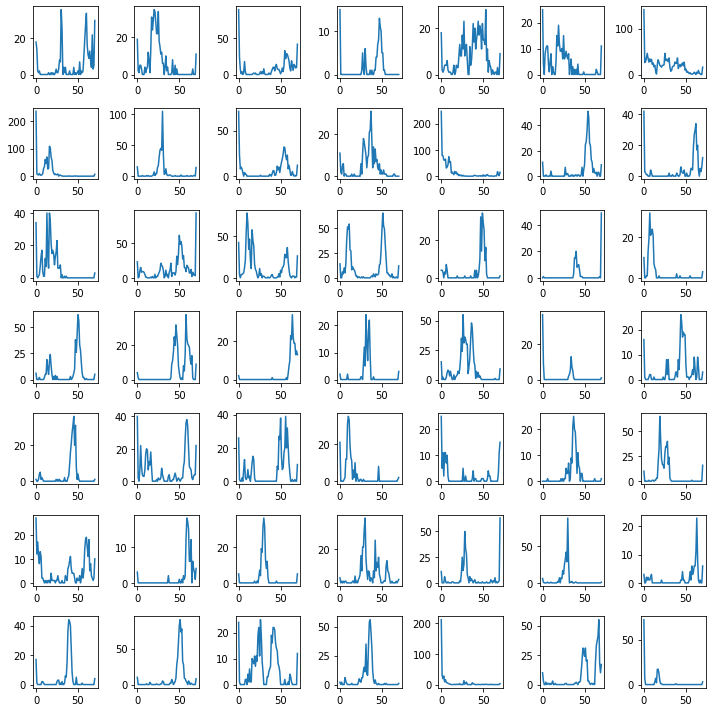

In [10]:
fig, ax = plt.subplots(7,7, figsize=(10,10))
for i in range(49):
    ax.flatten()[i].plot(
             preprocessed_data.place_field_data['spike_histograms'][i])
plt.tight_layout()

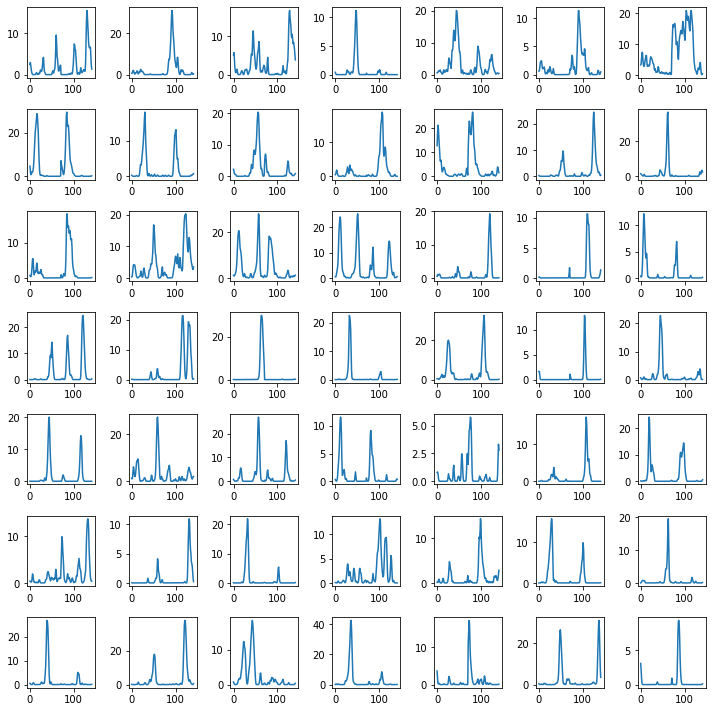

In [118]:
fig, ax = plt.subplots(7,7, figsize=(10,10))
for i in range(49):
    ax.flatten()[i].plot(
             preprocessed_data.place_field_data['place_fields'][i])
plt.tight_layout()

## ripple preprocessing

In [14]:
time_window_ms=15

In [16]:
ripple_params = Ripple_Preprocessing_Parameters(
            preprocessed_data.params, time_window_ms=time_window_ms)

In [18]:
spikemat_data = Ripple_Preprocessing(preprocessed_data, ripple_params)

Getting ripple spikemats
[35 14 42 ... 14 41 41]
[35 14 42 ... 14 41 41]
3.855141218710242 0.6452294471821785


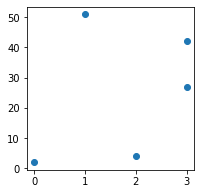

In [21]:
rip = 6
plt.figure(figsize=(3,3))
plt.plot(np.where(spikemat_data.ripple_info["spikemats_fullripple"][rip]==1)[0], 
         np.where(spikemat_data.ripple_info["spikemats_fullripple"][rip]==1)[1], 'o')

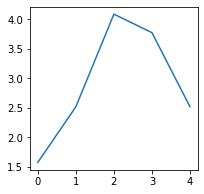

In [18]:
plt.figure(figsize=(3,3))
plt.plot(spikemat_data.ripple_info["avg_spikes_per_s_smoothed"][rip])

In [15]:
filename = DATA_PATH+'/spikemat_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms.obj'

serialized = pickle.dumps(spikemat_data)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

In [18]:
structure_analysis_input = Structure_Analysis_Input.reformat_ripple_data(
            spikemat_data, Poisson(), running_direction=False)

In [20]:
filename = RESULTS_PATH+'/structure_analysis_input/ripple_spikemat_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'
serialized = pickle.dumps(structure_analysis_input)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

## run snippet preprocessing

In [100]:
run_snippet_params = Run_Snippet_Preprocessing_Parameters(
            preprocessed_data.params, time_window_ms=time_window_ms
        )

In [101]:
spikemat_data_run_snippet = Run_Snippet_Preprocessing(
            preprocessed_data, spikemat_data, run_snippet_params)

Getting spikemats


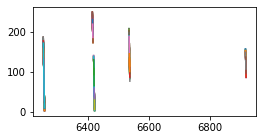

In [102]:
plt.figure(figsize=(4,2))
for i in range(len(spikemat_data_run_snippet.run_info['run_times_s'])):
    time = spikemat_data_run_snippet.run_info['run_times_s'][i]
    plt.plot(np.linspace(time[0], time[1], spikemat_data_run_snippet.run_info['true_trajectories_cm'][i].shape[0]), spikemat_data_run_snippet.run_info['true_trajectories_cm'][i])

In [19]:
structure_analysis_input_run = Structure_Analysis_Input.reformat_run_snippet_data(
            spikemat_data_run_snippet, Poisson())

In [20]:
filename = DATA_PATH+'/structure_analysis_input/run_snippet_spikemat_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'
serialized = pickle.dumps(structure_analysis_input_run)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

## selected data preprocessing (full trial)

In [93]:
# full data
preprocessed_data.data['pos_times_s'][0], preprocessed_data.data['pos_times_s'][-1]

(6199.0, 7047.8)

In [23]:
selected_data_params = Selected_Data_Preprocessing_Parameters(
            data_preprocess.params, time_window_ms=time_window_ms
        )

In [25]:
full_data_times = np.array([[preprocessed_data.data['pos_times_s'][0], preprocessed_data.data['pos_times_s'][-1]]])
spikemat_data_full = Selected_Data_Preprocessing(
            preprocessed_data, selected_data_params, full_data_times)

Getting spikemats


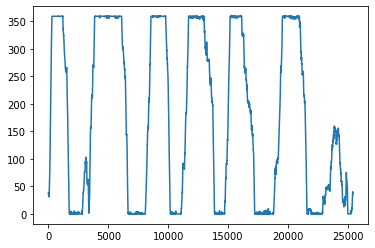

In [19]:
time = spikemat_data_full.run_info['run_times_s'][0]
plt.plot(spikemat_data_full.run_info['true_trajectories_cm'][0])

In [26]:
structure_analysis_input_full = Structure_Analysis_Input.reformat_selected_data(
            spikemat_data_full, Poisson(), running_direction=False)

In [27]:
filename = DATA_PATH+'/structure_analysis_input/full_data_spikemat_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'

serialized = pickle.dumps(structure_analysis_input_full)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

## run periods preprocessing

In [32]:
run_times = np.array(list(zip(preprocessed_data.velocity_info['run_starts'], preprocessed_data.velocity_info['run_ends'])))
run_times = np.array([run for run in run_times if np.diff(run) > 0.7 ])
spikemat_data_run = Selected_Data_Preprocessing(
            preprocessed_data, selected_data_params, run_times)

Getting spikemats


In [65]:
np.savetxt("runtimes.txt", run_times)

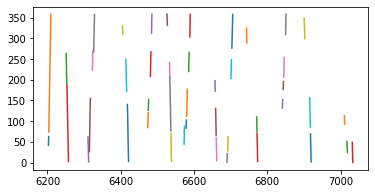

In [33]:
plt.figure(figsize=(6,3))
for i in range(len(spikemat_data_run.run_info['run_times_s'])):
    time = spikemat_data_run.run_info['run_times_s'][i]
    plt.plot(np.linspace(time[0], time[1], spikemat_data_run.run_info['true_trajectories_cm'][i].shape[0]), spikemat_data_run.run_info['true_trajectories_cm'][i])

In [25]:
filename = DATA_PATH+'/run_periods_spikemat_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'
serialized = pickle.dumps(spikemat_data_run)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

In [34]:
structure_analysis_input_run = Structure_Analysis_Input.reformat_selected_data(
            spikemat_data_run, Poisson(), running_direction=True)

In [35]:
filename = DATA_PATH+'/structure_analysis_input/run_periods_spiekmat_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'
serialized = pickle.dumps(structure_analysis_input_run)
with open(filename, "wb") as file_object:
    file_object.write(serialized)